# **EuroSCORE II**

In [23]:
import math

def euroscore_ii(age, sex, chronic_lung_disease, extracardiac_arteriopathy, poor_mobility, previous_cardiac_surgery, 
                 active_endocarditis, critical_preoperative_state, renal_impairment, diabetes_on_insulin, 
                 lv_function, urgency_of_operation, weight_of_operation, ccs_class_4, recent_mi, 
                 pulmonary_hypertension, nyha_class, thoracic_aorta_surgery):
    # Coefficients
    intercept = -5.324537
    coeffs = {
        'age': 0.0486477,
        'sex': 0.3951562,  # Female
        'chronic_lung_disease': 0.4544856,  # Pulmonary disease
        'extracardiac_arteriopathy': 0.7637420,
        'poor_mobility': 0.7644773,
        'previous_cardiac_surgery': 1.2818960,
        'active_endocarditis': 1.4028970,
        'critical_preoperative_state': 2.1827250,
        'renal_impairment_normal': 0.0,
        'renal_impairment_moderate': 0.2218056,
        'renal_impairment_severe': 0.6647962,
        'renal_impairment_dialysis': 1.2033870,
        'diabetes_on_insulin': 0.3542749,
        'lv_function_good': 0.0,
        'lv_function_moderate': 0.4626558,
        'lv_function_poor': 1.4371450,
        'lv_function_very_poor': 1.6481420,
        'urgency_elective': 0.0,
        'urgency_urgent': 0.8295933,
        'urgency_emergency': 1.8998760,
        'urgency_salvage': 2.9450770,
        'weight_isolated_cabg': 0.0,
        'weight_single_non_cabg': 0.2216732,
        'weight_two_procedures': 0.8473152,
        'weight_three_or_more': 1.2831780,
        'ccs_class_4': 0.8217379,
        'recent_mi': 0.2863484,
        'pulmonary_hypertension_no': 0.0,
        'pulmonary_hypertension_moderate': 0.1647881,
        'pulmonary_hypertension_severe': 0.7566437,
        'nyha_class_i': 0.0,
        'nyha_class_ii': 0.0777918,
        'nyha_class_iii': 0.7037355,
        'nyha_class_iv': 1.9128670,
        'thoracic_aorta_surgery': 0.8267812
    }
    
    # Age score
    age_score = coeffs['age'] * (1 if age <= 60 else age - 60 + 1)
    
    # Renal impairment score
    renal_impairment_score = coeffs[f'renal_impairment_{renal_impairment.lower()}']
    
    # LV function score
    lv_function_score = coeffs[f'lv_function_{lv_function.lower().replace(" ", "_")}']
    
    # Urgency score
    urgency_score = coeffs[f'urgency_{urgency_of_operation.lower()}']
    
    # Weight of operation score
    weight_score = coeffs[f'weight_{weight_of_operation.lower().replace(" ", "_")}']
    
    # Pulmonary hypertension score
    pulmonary_hypertension_score = coeffs[f'pulmonary_hypertension_{pulmonary_hypertension.lower()}']
    
    # NYHA class score
    nyha_class_score = coeffs[f'nyha_class_{nyha_class.lower().replace(" ", "_")}']
    
    # Summing up all coefficients
    logit = (intercept + age_score + 
             coeffs['sex'] * sex + 
             coeffs['chronic_lung_disease'] * chronic_lung_disease + 
             coeffs['extracardiac_arteriopathy'] * extracardiac_arteriopathy + 
             coeffs['poor_mobility'] * poor_mobility + 
             coeffs['previous_cardiac_surgery'] * previous_cardiac_surgery + 
             coeffs['active_endocarditis'] * active_endocarditis + 
             coeffs['critical_preoperative_state'] * critical_preoperative_state + 
             renal_impairment_score + 
             coeffs['diabetes_on_insulin'] * diabetes_on_insulin + 
             lv_function_score + 
             urgency_score + 
             weight_score + 
             coeffs['ccs_class_4'] * ccs_class_4 + 
             coeffs['recent_mi'] * recent_mi + 
             pulmonary_hypertension_score + 
             nyha_class_score + 
             coeffs['thoracic_aorta_surgery'] * thoracic_aorta_surgery)
    
    # Calculating predicted mortality
    predicted_mortality = math.exp(logit) / (1 + math.exp(logit))
    
    return predicted_mortality

# Example usage with the same inputs as the web calculator
predicted_mortality = euroscore_ii(age=65, sex=1, chronic_lung_disease=1, extracardiac_arteriopathy=0, 
                                   poor_mobility=0, previous_cardiac_surgery=1, active_endocarditis=0, 
                                   critical_preoperative_state=1, renal_impairment='severe', diabetes_on_insulin=1, 
                                   lv_function='moderate', urgency_of_operation='urgent', weight_of_operation='two_procedures', 
                                   ccs_class_4=1, recent_mi=1, pulmonary_hypertension='moderate', nyha_class='iii', 
                                   thoracic_aorta_surgery=1)

print(f"Predicted Mortality: {predicted_mortality:.4f}")


Predicted Mortality: 0.9947


# **Synthetic dataset**

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to create synthetic data
def create_synthetic_data(n_samples=1000):
    np.random.seed(42)
    data = {
        'age': np.random.randint(50, 90, n_samples),
        'sex': np.random.randint(0, 2, n_samples),
        'chronic_lung_disease': np.random.randint(0, 2, n_samples),
        'extracardiac_arteriopathy': np.random.randint(0, 2, n_samples),
        'poor_mobility': np.random.randint(0, 2, n_samples),
        'previous_cardiac_surgery': np.random.randint(0, 2, n_samples),
        'active_endocarditis': np.random.randint(0, 2, n_samples),
        'critical_preoperative_state': np.random.randint(0, 2, n_samples),
        'renal_impairment': np.random.choice(['normal', 'moderate', 'severe', 'dialysis'], n_samples),
        'diabetes_on_insulin': np.random.randint(0, 2, n_samples),
        'lv_function': np.random.choice(['good', 'moderate', 'poor', 'very poor'], n_samples),
        'urgency_of_operation': np.random.choice(['elective', 'urgent', 'emergency', 'salvage'], n_samples),
        'weight_of_operation': np.random.choice(['isolated_cabg', 'single_non_cabg', 'two_procedures', 'three_or_more'], n_samples),
        'ccs_class_4': np.random.randint(0, 2, n_samples),
        'recent_mi': np.random.randint(0, 2, n_samples),
        'pulmonary_hypertension': np.random.choice(['no', 'moderate', 'severe'], n_samples),
        'nyha_class': np.random.choice(['i', 'ii', 'iii', 'iv'], n_samples),
        'thoracic_aorta_surgery': np.random.randint(0, 2, n_samples),
        'mortality': np.random.randint(0, 2, n_samples)  # This is the target column
    }
    return pd.DataFrame(data)

# **MLP Model**

## Step 1: Prepare the Data

## Step 2: Preprocess the Data

In [25]:
# Generate synthetic dataset
df = create_synthetic_data()

# Define features and target
features = df.drop(columns=['mortality'])
target = df['mortality']

# Define preprocessing for numerical and categorical features
numeric_features = ['age']
categorical_features = [
    'sex', 'chronic_lung_disease', 'extracardiac_arteriopathy', 'poor_mobility', 'previous_cardiac_surgery',
    'active_endocarditis', 'critical_preoperative_state', 'renal_impairment', 'diabetes_on_insulin',
    'lv_function', 'urgency_of_operation', 'weight_of_operation', 'ccs_class_4', 'recent_mi',
    'pulmonary_hypertension', 'nyha_class', 'thoracic_aorta_surgery'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Step 3: Build the MLP Model

In [26]:

# Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         3,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,633 (22.00 KB)

 Trainable params: 5,633 (22.00 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train and Evaluate the Model

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4871 - loss: 0.6981 - val_accuracy: 0.4750 - val_loss: 0.6950
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.5761 - loss: 0.6835 - val_accuracy: 0.5188 - val_loss: 0.6962
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6175 - loss: 0.6683 - val_accuracy: 0.5312 - val_loss: 0.7040
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.6450 - loss: 0.6542 - val_accuracy: 0.5188 - val_loss: 0.7026
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.7021 - loss: 0.6301 - val_accuracy: 0.5188 - val_loss: 0.7037
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.7169 - loss: 0.5938 - val_accuracy: 0.4875 - val_loss: 0.7621
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.6967 - loss: 0.5879 - val_accuracy: 0.5500 - val_loss: 0.7133
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7086 - loss: 0.5655 - val_accuracy: 0.5188

In [28]:
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5050


# **Compare the MLP model to the EuroSCORE**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
EuroSCORE II - ROC AUC: 0.3990, Brier Score: 0.3873
ML Model - ROC AUC: 0.4731, Brier Score: 0.4422


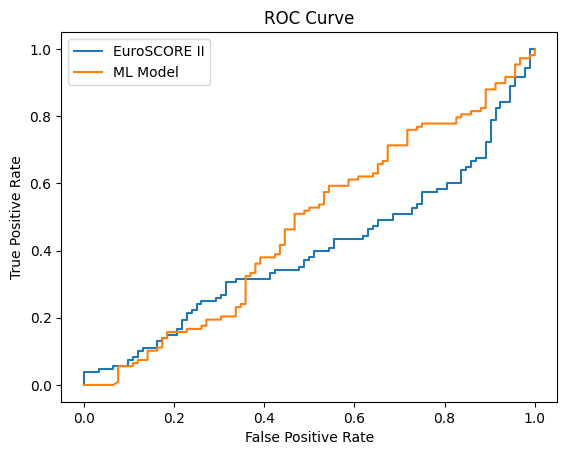

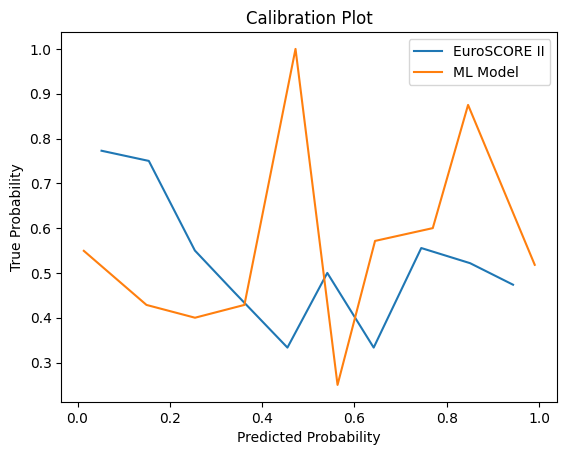

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming you have already trained the MLP model and have the test set (X_test, y_test)
# Predict probabilities with the MLP model
y_pred_ml = model.predict(X_test).flatten()

# Calculate EuroSCORE II predictions
# For this example, we'll generate synthetic EuroSCORE II predictions (normally you would have real ones)
np.random.seed(42)
y_pred_euroscore = np.random.rand(len(y_test))

# Calculate EuroSCORE II performance
roc_auc_euroscore = roc_auc_score(y_test, y_pred_euroscore)
brier_euroscore = brier_score_loss(y_test, y_pred_euroscore)

# Calculate ML model performance
roc_auc_ml = roc_auc_score(y_test, y_pred_ml)
brier_ml = brier_score_loss(y_test, y_pred_ml)

# Print performance
print(f"EuroSCORE II - ROC AUC: {roc_auc_euroscore:.4f}, Brier Score: {brier_euroscore:.4f}")
print(f"ML Model - ROC AUC: {roc_auc_ml:.4f}, Brier Score: {brier_ml:.4f}")

# Plot ROC curves
fpr_euroscore, tpr_euroscore, _ = roc_curve(y_test, y_pred_euroscore)
fpr_ml, tpr_ml, _ = roc_curve(y_test, y_pred_ml)

plt.figure()
plt.plot(fpr_euroscore, tpr_euroscore, label='EuroSCORE II')
plt.plot(fpr_ml, tpr_ml, label='ML Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calibration plots
prob_true_euroscore, prob_pred_euroscore = calibration_curve(y_test, y_pred_euroscore, n_bins=10)
prob_true_ml, prob_pred_ml = calibration_curve(y_test, y_pred_ml, n_bins=10)

plt.figure()
plt.plot(prob_pred_euroscore, prob_true_euroscore, label='EuroSCORE II')
plt.plot(prob_pred_ml, prob_true_ml, label='ML Model')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Plot')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
EuroSCORE II - ROC AUC: 0.3990, Brier Score: 0.3873
ML Model - ROC AUC: 0.4731, Brier Score: 0.4422


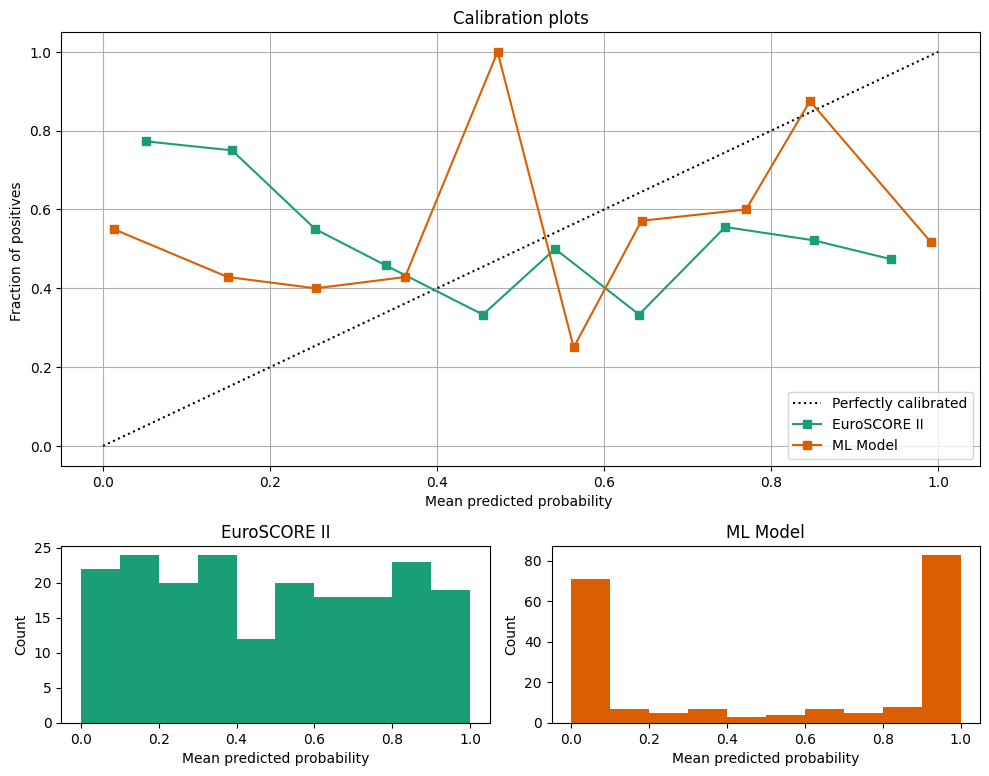

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve
from sklearn.calibration import calibration_curve, CalibrationDisplay
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Assuming you have already trained the MLP model and have the test set (X_test, y_test)
# Predict probabilities with the MLP model
y_pred_ml = model.predict(X_test).flatten()

# Calculate EuroSCORE II predictions
# For this example, we'll generate synthetic EuroSCORE II predictions (normally you would have real ones)
np.random.seed(42)
y_pred_euroscore = np.random.rand(len(y_test))

# Calculate EuroSCORE II performance
roc_auc_euroscore = roc_auc_score(y_test, y_pred_euroscore)
brier_euroscore = brier_score_loss(y_test, y_pred_euroscore)

# Calculate ML model performance
roc_auc_ml = roc_auc_score(y_test, y_pred_ml)
brier_ml = brier_score_loss(y_test, y_pred_ml)

# Print performance
print(f"EuroSCORE II - ROC AUC: {roc_auc_euroscore:.4f}, Brier Score: {brier_euroscore:.4f}")
print(f"ML Model - ROC AUC: {roc_auc_ml:.4f}, Brier Score: {brier_ml:.4f}")

# Prepare plot
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

# Calibration plots
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
models = [
    (y_pred_euroscore, "EuroSCORE II"),
    (y_pred_ml, "ML Model")
]

for i, (y_pred, name) in enumerate(models):
    prob_true, prob_pred = calibration_curve(y_test, y_pred, n_bins=10)
    display = CalibrationDisplay(prob_true, prob_pred, y_pred)
    display.plot(ax=ax_calibration_curve, name=name, color=colors(i))
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histograms
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (y_pred, name) in enumerate(models):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    ax.hist(
        y_pred,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()


# Test:

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html

In [30]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression(C=1.0)
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (gnb_isotonic, "Naive Bayes + Isotonic"),
    (gnb_sigmoid, "Naive Bayes + Sigmoid"),
]

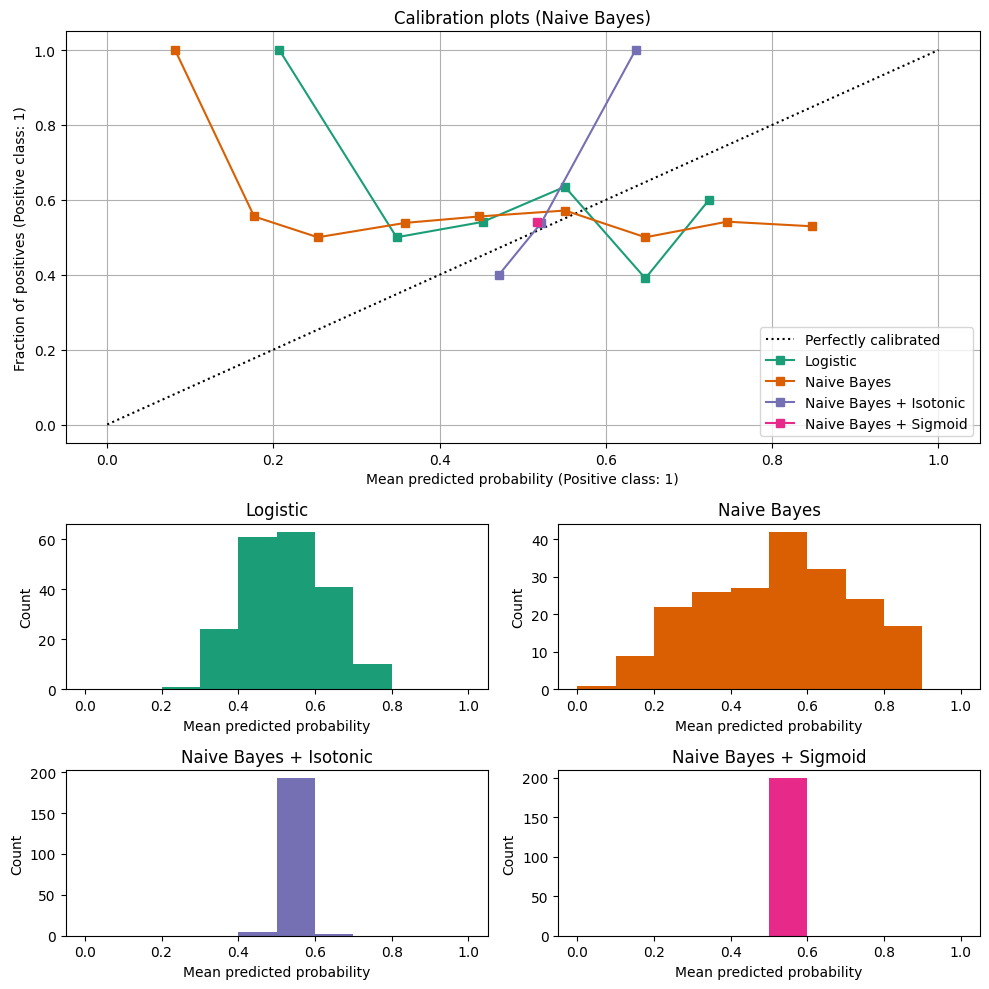

In [31]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

In [32]:
from collections import defaultdict

import pandas as pd

from sklearn.metrics import (
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    roc_auc_score,
)

scores = defaultdict(list)
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_test, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

,Brier loss,Log loss,Roc auc,Precision,Recall,F1
Classifier,,,,,,
Logistic,0.265118,0.725666,0.478563,0.54386,0.574074,0.558559
Naive Bayes,0.290264,0.794479,0.484501,0.53913,0.574074,0.556054
Naive Bayes + Isotonic,0.247773,0.688636,0.500654,0.54359,0.981481,0.699670
Naive Bayes + Sigmoid,0.248997,0.691140,0.492452,0.54000,1.000000,0.701299
